In [2]:
import firebase_admin

databaseURL = 'https://iot-db-27d22-default-rtdb.asia-southeast1.firebasedatabase.app/'
cred_obj = firebase_admin.credentials.Certificate(
    'iot-db-27d22-firebase-adminsdk-fbsvc-4ea59eedfe.json'
)
default_app = firebase_admin.initialize_app(cred_obj, {
	'databaseURL':databaseURL
	})

In [ ]:
import csv
from firebase_admin import db


ref = db.reference('/gyroscope')
all_data = ref.get() 

with open('gyro_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['timestamp', 'gyro_x', 'gyro_y', 'gyro_z'])
    for key, sample in all_data.items():
        writer.writerow([
            sample.get('timestamp'),
            sample.get('gyro_x'),
            sample.get('gyro_y'),
            sample.get('gyro_z')
        ])
print("Data saved to gyro_data.csv")


Data saved to gyro_data.csv


In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('gyro_data.csv')
df = df.dropna() 

df = df[pd.to_numeric(df['gyro_x'], errors='coerce').notnull()]
df.to_csv('gyro_data_clean.csv', index=False)

df = pd.read_csv('gyro_data_clean.csv', parse_dates=['timestamp'])
df['ts'] = pd.to_datetime(df['timestamp'], unit='s')
df = df[df['ts'] >= '2025-08-20 10:00:00']

Clean data saved.


In [ ]:
df = pd.read_csv('gyro_data_clean.csv', parse_dates=['timestamp'])
df

/var/folders/3y/dd2_h5492gj2f1b01t_fksph0000gn/T/ipykernel_5256/3437097109.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('gyro_data_clean.csv', parse_dates=['timestamp'])


,timestamp,gyro_x,gyro_y,gyro_z
0,1755663691.341044,-0.128,-0.992,-0.029
1,1755663691.98256,-0.128,-0.993,-0.029
2,1755663692.1201851,-0.127,-0.990,-0.029
3,1755663692.249658,-0.124,-0.992,-0.032
4,1755663692.377728,-0.204,-0.926,0.116
...,...,...,...,...
27926,1755687871.135472,-0.044,-0.729,0.709
27927,1755687871.260896,-0.043,-0.729,0.710
27928,1755687871.369747,-0.043,-0.728,0.710
27929,1755687871.492574,-0.043,-0.728,0.709


In [15]:
df['ts'] = pd.to_datetime(df['timestamp'], unit='s')
df = df[df['ts'] >= '2025-08-20 10:00:00']

/var/folders/3y/dd2_h5492gj2f1b01t_fksph0000gn/T/ipykernel_5256/3299595835.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['ts'] = pd.to_datetime(df['timestamp'], unit='s')


In [16]:
df

,timestamp,gyro_x,gyro_y,gyro_z,ts
3126,1755684192.640821,0.208,-0.829,-0.531,2025-08-20 10:03:12.640820980
3127,1755684192.957577,0.194,-0.805,-0.565,2025-08-20 10:03:12.957576990
3128,1755684193.087134,0.180,-0.778,-0.603,2025-08-20 10:03:13.087133884
3129,1755684193.210911,0.171,-0.760,-0.629,2025-08-20 10:03:13.210911036
3130,1755684193.343306,0.169,-0.757,-0.636,2025-08-20 10:03:13.343306065
...,...,...,...,...,...
27926,1755687871.135472,-0.044,-0.729,0.709,2025-08-20 11:04:31.135472059
27927,1755687871.260896,-0.043,-0.729,0.710,2025-08-20 11:04:31.260895967
27928,1755687871.369747,-0.043,-0.728,0.710,2025-08-20 11:04:31.369746923
27929,1755687871.492574,-0.043,-0.728,0.709,2025-08-20 11:04:31.492573977


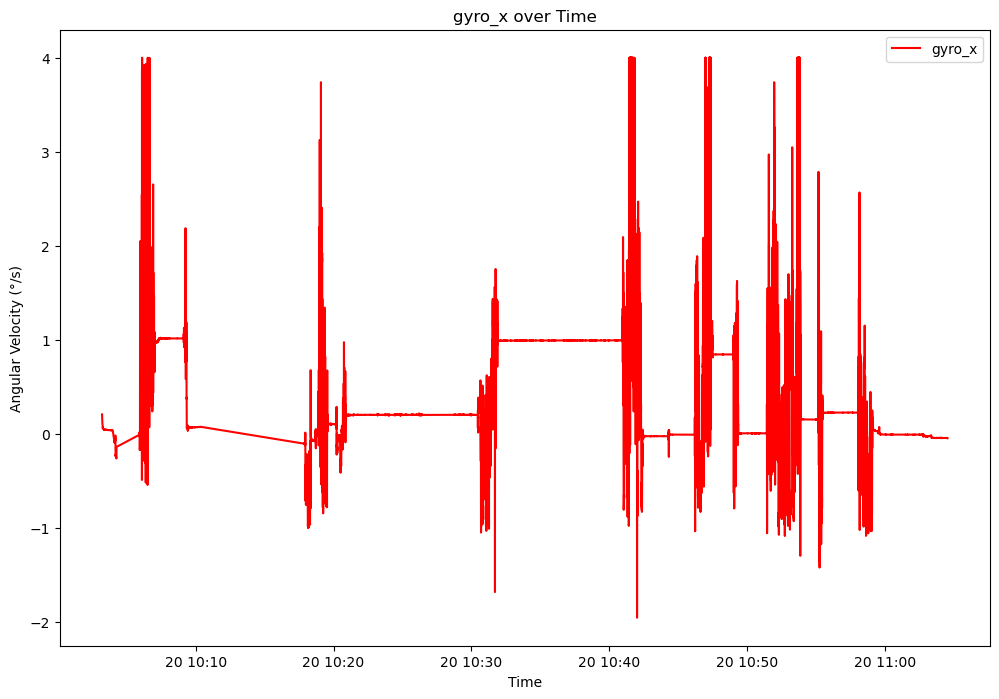

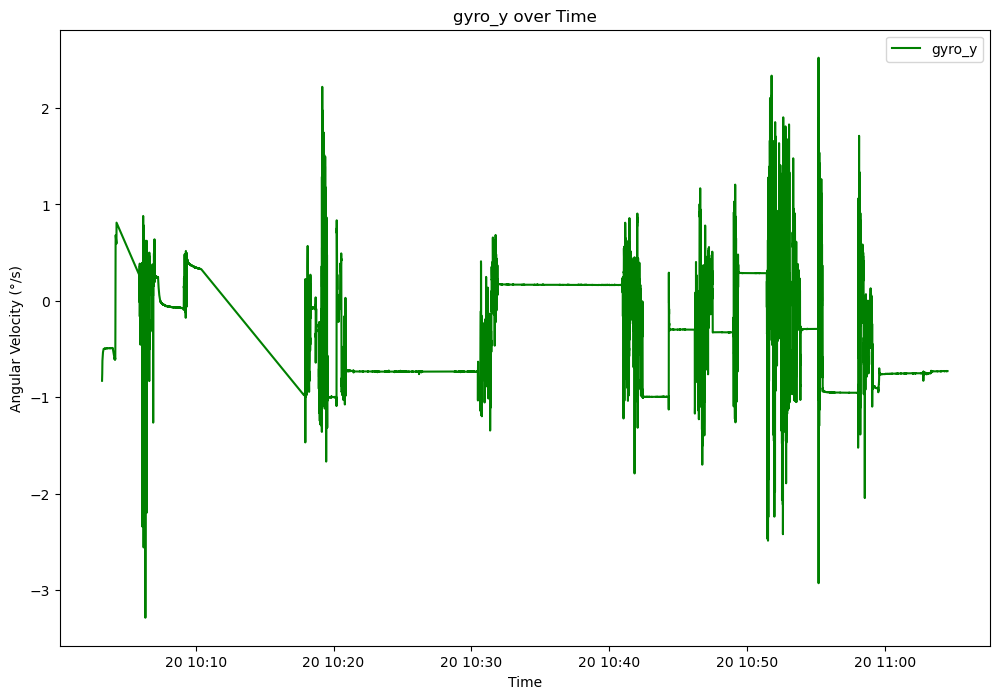

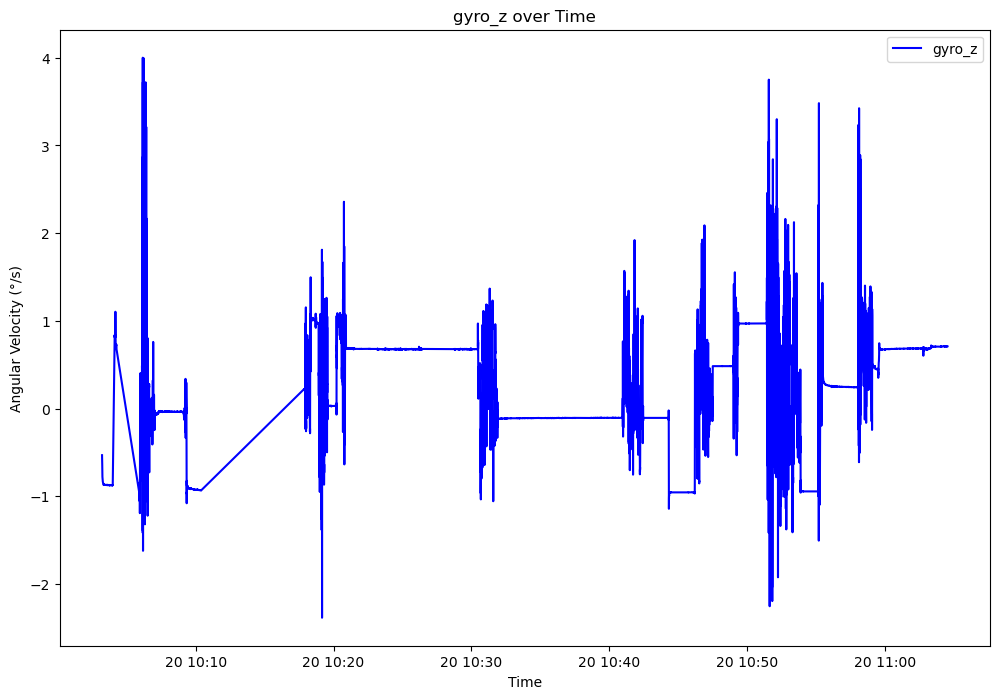

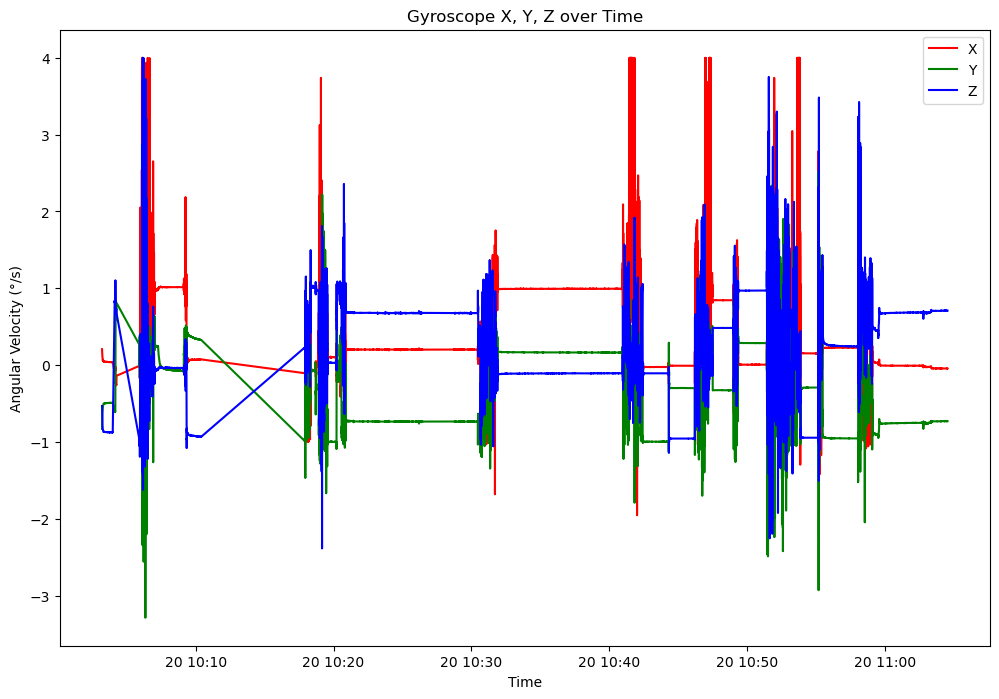

In [19]:
# 3 đồ thị riêng biệt

for var, color in zip(['gyro_x','gyro_y','gyro_z'], ['r','g','b']):
    plt.figure(figsize=(12, 8))
    plt.plot(df['ts'], df[var], label=var, color=color)
    plt.legend()
    plt.title(f"{var} over Time")
    plt.xlabel("Time"); plt.ylabel("Angular Velocity (°/s)")
    plt.show()

# Đồ thị chung
plt.figure(figsize=(12, 8))
plt.plot(df['ts'], df['gyro_x'], 'r', label='X')
plt.plot(df['ts'], df['gyro_y'], 'g', label='Y')
plt.plot(df['ts'], df['gyro_z'], 'b', label='Z')
plt.title("Gyroscope X, Y, Z over Time")
plt.xlabel("Time"); plt.ylabel("Angular Velocity (°/s)")
plt.legend()
plt.show()